<a href="https://colab.research.google.com/github/sadeelmu/deeplearning/blob/main/Intro_to_convolutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="https://drive.google.com/uc?id=1_XAupkKFAi2XsTrHddxggF-AtlCM_JJN"/></center>

------
<center>&copy; Research Group CAMMA, University of Strasbourg, <a href="http://camma.u-strasbg.fr">http://camma.u-strasbg.fr</a> </center>

------

Author: [Tobias Czempiel](https://https://www.cs.cit.tum.de/camp/members/tobias-czempiel/) from TUM
</center>

------

# <center><font color=green> Introduction to Convolutions </font></center>
In this notebook, we will learn about Convolutions.

## Setup

In [ ]:
# install dependencies

# download resources

In [ ]:
from scipy import ndimage
import scipy
import numpy as np
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
import matplotlib
from PIL import Image
from skimage.transform import resize



%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np


## Introduction to Convolutions


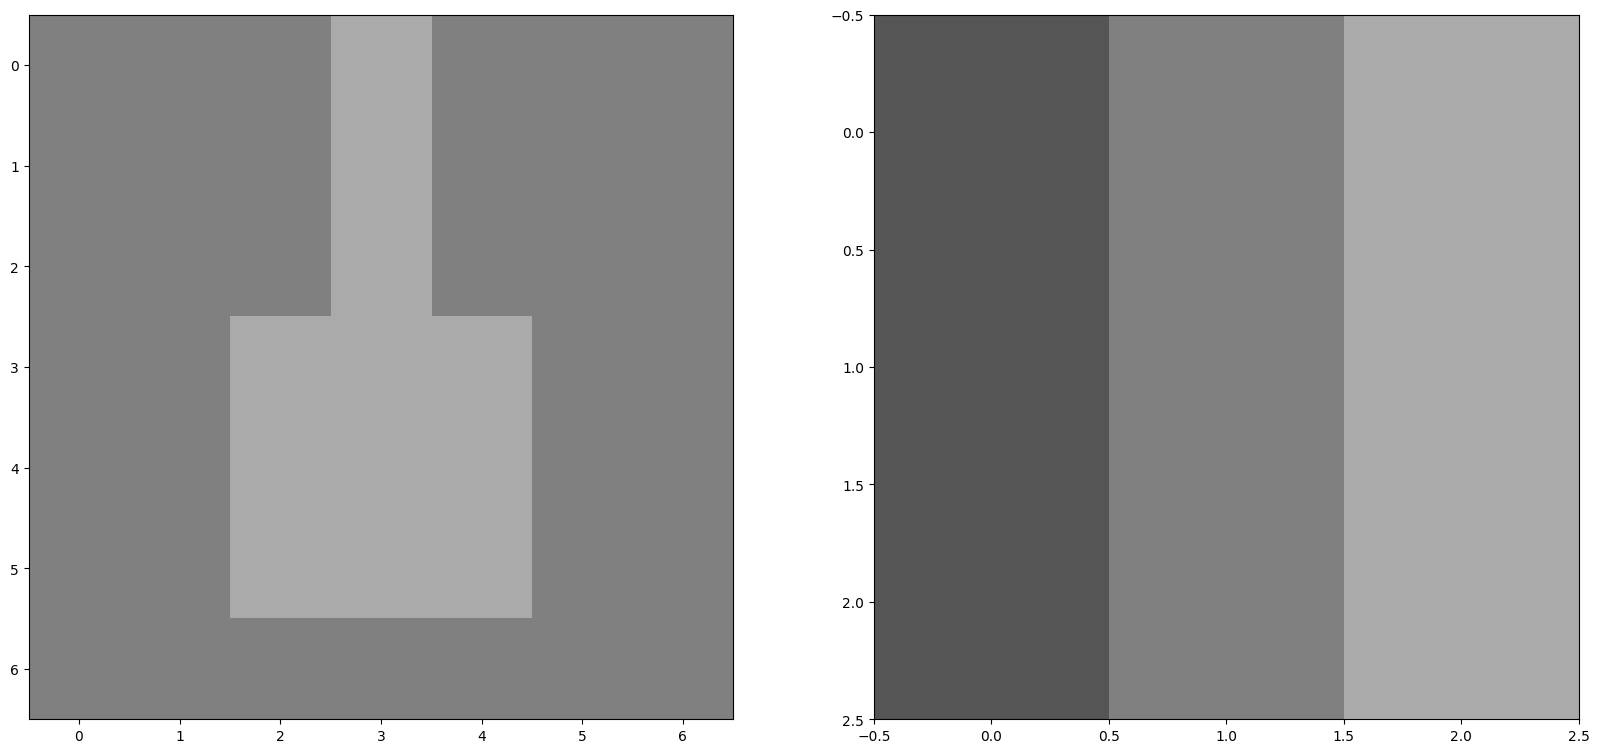

In [ ]:
# Define an image
image = [
   [0,0,0,1,0,0,0],
   [0,0,0,1,0,0,0],
   [0,0,0,1,0,0,0],
   [0,0,1,1,1,0,0],
   [0,0,1,1,1,0,0],
   [0,0,1,1,1,0,0],
   [0,0,0,0,0,0,0],
]

# Define the filter
filter = [
  [-1,0,1],
  [-1,0,1],
  [-1,0,1]
]

# Display the image and filter
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,20))

ax1.imshow(image, cmap='gray', vmin=-3, vmax=3)
ax2.imshow(filter, cmap='gray', vmin=-3, vmax=3)
plt.show()

In [ ]:
# apply convolution operation
def convolve_img(img, fi):
    filtered = ndimage.correlate(img, fi, mode='constant', cval=0.0)
    #filtered = ndimage.correlate(img, fi, mode='mirror')
    return filtered


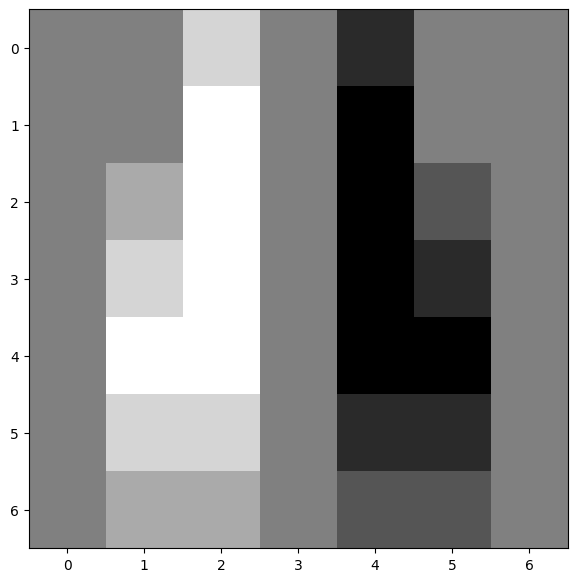

In [ ]:
filtered_img = convolve_img(image, filter)
# Display the image
plt.figure(figsize=(7,7))
plt.imshow(filtered_img, cmap='gray', vmin=-3, vmax=3)
plt.show()


In [ ]:
print(filtered_img)

[[ 0  0  2  0 -2  0  0]
 [ 0  0  3  0 -3  0  0]
 [ 0  1  3  0 -3 -1  0]
 [ 0  2  3  0 -3 -2  0]
 [ 0  3  3  0 -3 -3  0]
 [ 0  2  2  0 -2 -2  0]
 [ 0  1  1  0 -1 -1  0]]


## Loading an Image

We will use the matplotlib.image library for loading the image from our computer.



In [ ]:
!wget https://hips.hearstapps.com/hmg-prod/images/white-cat-in-park-1556611722.jpg -O cat.jpg
!wget https://hips.hearstapps.com/hmg-prod/images/dog-puppy-on-garden-royalty-free-image-1586966191.jpg -O dog.jpg

--2024-11-08 16:06:51--  https://hips.hearstapps.com/hmg-prod/images/white-cat-in-park-1556611722.jpg
Resolving hips.hearstapps.com (hips.hearstapps.com)... 151.101.0.155, 151.101.64.155, 151.101.128.155, ...
Connecting to hips.hearstapps.com (hips.hearstapps.com)|151.101.0.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 284402 (278K) [image/jpeg]
Saving to: ‘cat.jpg’

cat.jpg             100%[===================>] 277.74K  --.-KB/s    in 0.04s   

2024-11-08 16:06:51 (6.16 MB/s) - ‘cat.jpg’ saved [284402/284402]

--2024-11-08 16:06:51--  https://hips.hearstapps.com/hmg-prod/images/dog-puppy-on-garden-royalty-free-image-1586966191.jpg
Resolving hips.hearstapps.com (hips.hearstapps.com)... 151.101.0.155, 151.101.64.155, 151.101.128.155, ...
Connecting to hips.hearstapps.com (hips.hearstapps.com)|151.101.0.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 229955 (225K) [image/jpeg]
Saving to: ‘dog.jpg’

dog.jpg             100%[==

cat.jpg  dog.jpg  sample_data


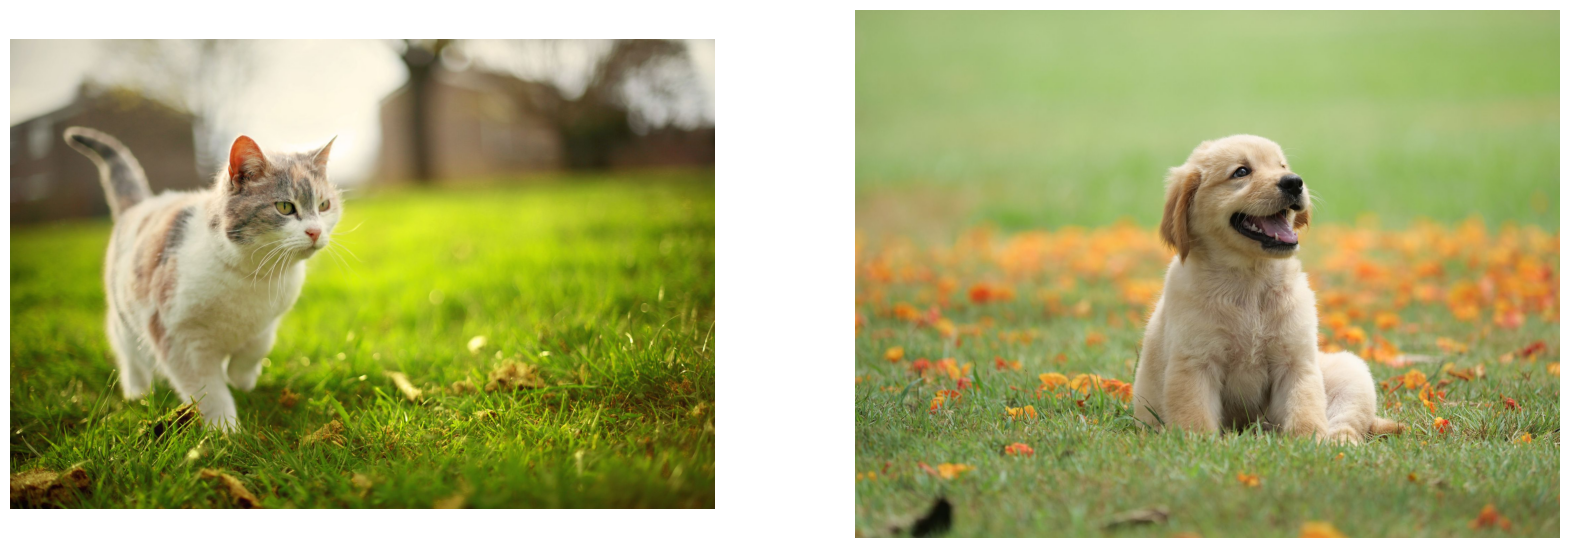

In [ ]:
# Load an image
!ls
cat = mpimg.imread("cat.jpg")
dog = mpimg.imread("dog.jpg")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,20))
ax1.imshow(cat, cmap='gray')
ax1.axis('off')
ax2.imshow(dog, cmap='gray')
ax2.axis('off')
plt.show()

## Image pre processing

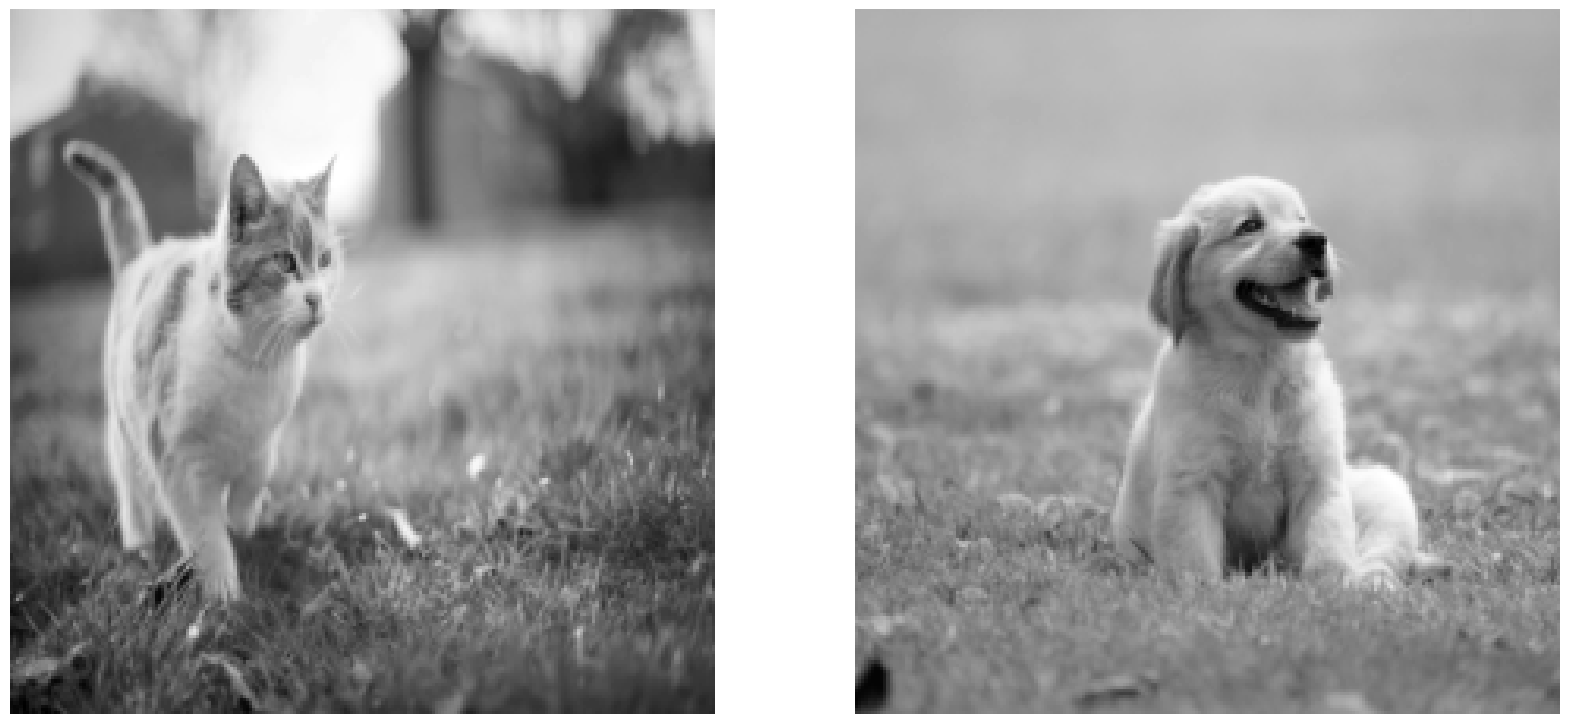

In [ ]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

# turns color to greyscale
bw_cat = rgb2gray(cat)
bw_dog = rgb2gray(dog)
# crops 200 pixel on ther right and the left
bw_dog = bw_dog[:,200:-200]

# new shape of the image
size_img =(224,224)

# resizing of images
bw_cat = resize(bw_cat, size_img)
bw_dog = resize(bw_dog, size_img)

# visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,20))
ax1.imshow(bw_cat, cmap='gray')
ax1.axis('off')
ax2.imshow(bw_dog, cmap='gray')
ax2.axis('off')

plt.show()

## Image Convolution

(-0.5, 223.5, 223.5, -0.5)

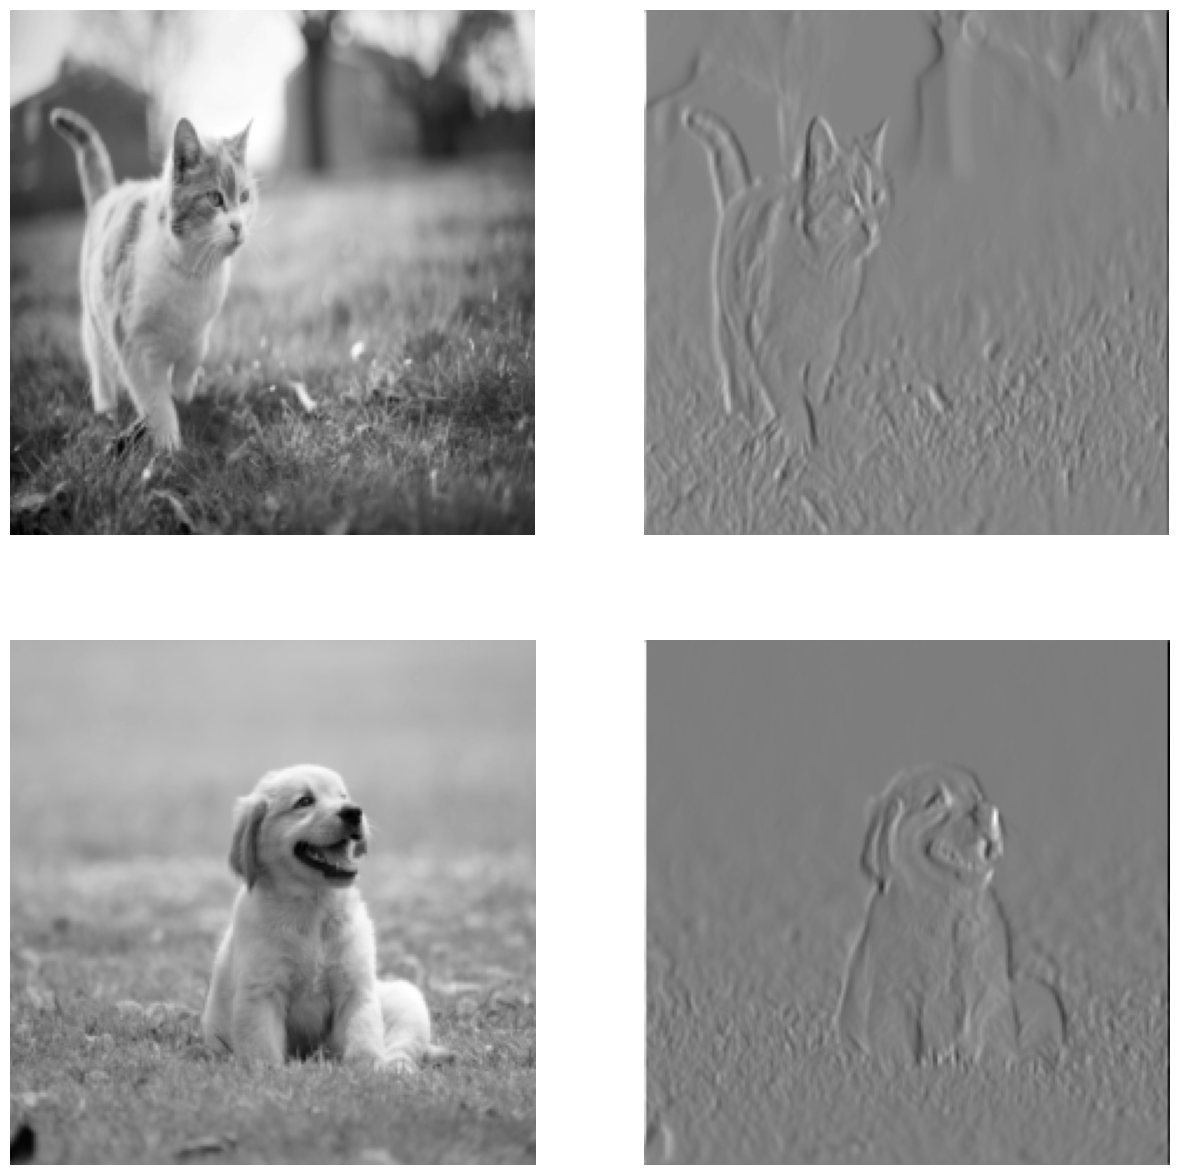

In [ ]:
filter = [
  [-1,0,1],
  [-1,0,1],
  [-1,0,1]
]


filter2 = [
  [-1,-1,-1],
  [-1,8,-1],
  [-1,-1,-1]
]


bw_cat_conv_1 = convolve_img(bw_cat, filter)
bw_dog_conv_1 = convolve_img(bw_dog, filter)


fig, ax = plt.subplots(2, 2, figsize=(15,15))
ax[0,0].imshow(bw_cat, cmap='gray')
ax[0,0].axis('off')
ax[0,1].imshow(bw_cat_conv_1, cmap='gray')
ax[0,1].axis('off')
ax[1,0].imshow(bw_dog, cmap='gray')
ax[1,0].axis('off')
ax[1,1].imshow(bw_dog_conv_1, cmap='gray')
ax[1,1].axis('off')


# Detecting Cats from its standing ears

In [ ]:
filter_blur= [
  [1/9,1/9,1/9],
  [1/9,1/9,1/9],
  [1/9,1/9,1/9]
]


filter = [
  [-1,-1,-1],
  [-1,8,-1],
  [-1,-1,-1]
]

# Bluring
bw_cat_conv = convolve_img(bw_cat, filter_blur)
bw_dog_conv = convolve_img(bw_dog, filter_blur)

# Edge Detection
bw_cat_conv = convolve_img(bw_cat_conv, filter)
bw_dog_conv = convolve_img(bw_dog_conv, filter)

# Bluring
bw_cat_conv = convolve_img(bw_cat_conv, filter_blur)
bw_dog_conv = convolve_img(bw_dog_conv, filter_blur)

# Edge Detection
bw_cat_conv = convolve_img(bw_cat_conv, filter)
bw_dog_conv = convolve_img(bw_dog_conv, filter)



(-0.5, 223.5, 223.5, -0.5)

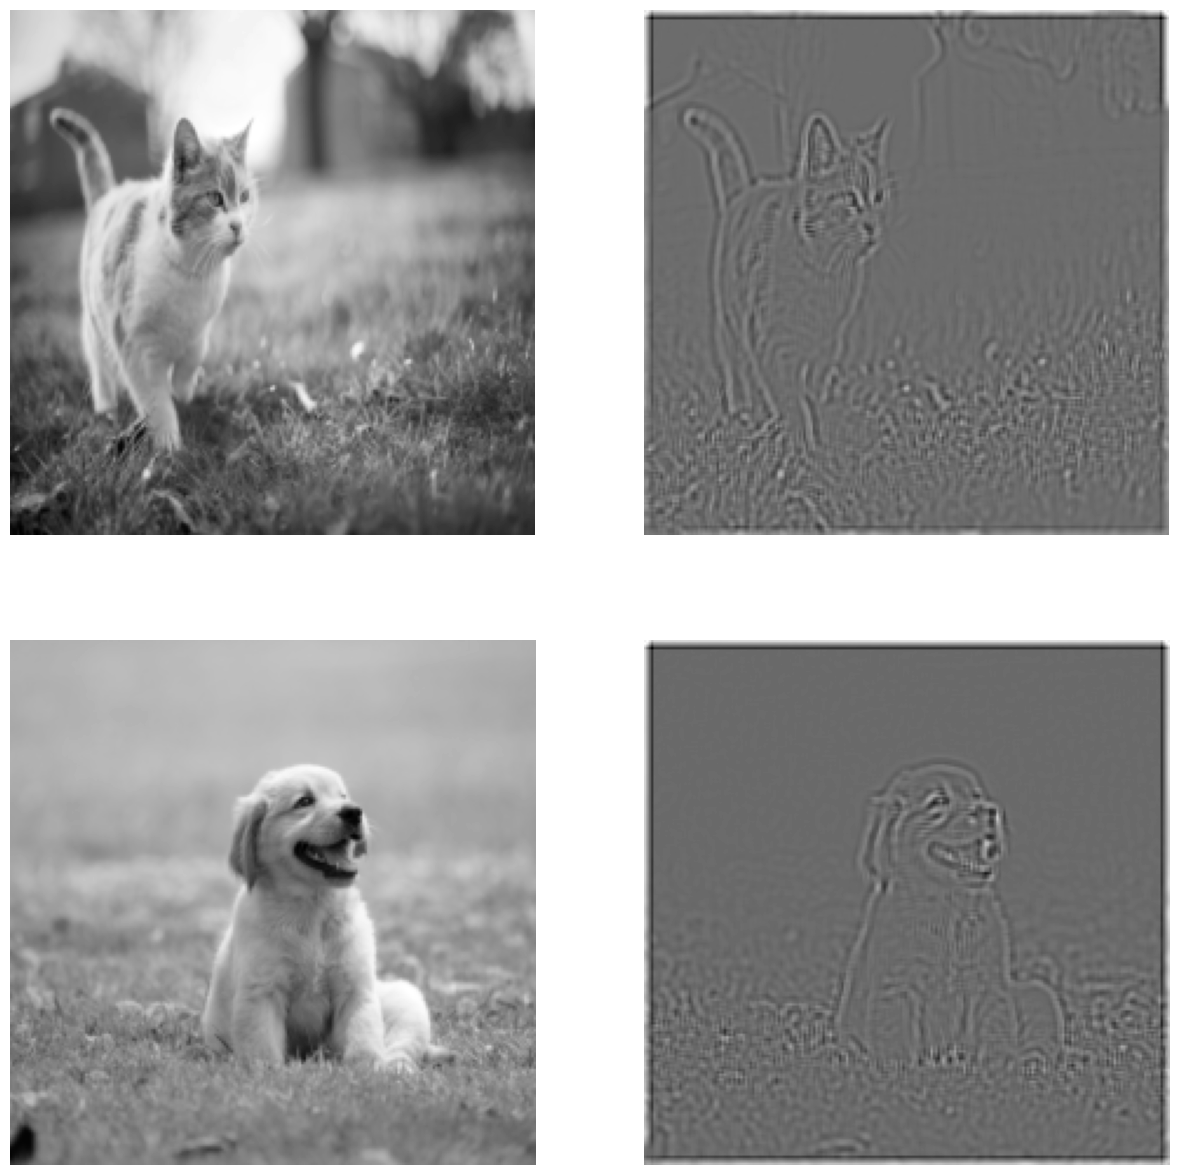

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(15,15))


ax[0,0].imshow(bw_cat, cmap='gray')
ax[0,0].axis('off')
ax[0,1].imshow(bw_cat_conv, cmap='gray')
ax[0,1].axis('off')
ax[1,0].imshow(bw_dog, cmap='gray')
ax[1,0].axis('off')
ax[1,1].imshow(bw_dog_conv, cmap='gray')
ax[1,1].axis('off')

## Find highest value per row

In [ ]:

def highest_per_line(in_img, amount=4, margin_sides=50):
  response = np.zeros_like(in_img)
  for i in range(int(in_img.shape[0])):
    ind = np.argpartition(in_img[i,margin_sides:-margin_sides], -amount)[-amount:]
    for j in ind:
      response[i,margin_sides+j]=1
  return response


response_cat = highest_per_line(bw_cat_conv)
response_dog = highest_per_line(bw_dog_conv)


In [ ]:

def f(input, slider_value):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,20))
    if input == "cat":
      bw_img = bw_cat_conv
      r_c = response_cat.copy()
    else:
      bw_img = bw_dog_conv
      r_c = response_dog.copy()

    ax1.imshow(bw_img, cmap='gray')
    ax1.plot(range(224), [slider_value]*224, '--', linewidth=5, color='firebrick')
    ax1.axis('off')
    r_c[slider_value:,:] = 0

    ax2.imshow(r_c, cmap='gray')
    ax2.axis('off')
    plt.show()


interactive_plot = interactive(f, input=['cat','dog'], slider_value=(0, 223, 1), continuous_update=False)
output = interactive_plot.children[-1]
output.layout.height = '500px'
interactive_plot

interactive(children=(Dropdown(description='input', options=('cat', 'dog'), value='cat'), IntSlider(value=111,…

## Rule based ear detector

In [ ]:
from numpy.core.numeric import True_
from skimage.util.dtype import img_as_ubyte
def detect_ear_pattern(input_response):
    detected_ear_pattern = np.zeros_like(input_response)
    detected_ears_pattern = np.zeros_like(input_response)
    img_width = input_response.shape[0]
    indices = np.argwhere(input_response>0)

    min_ear_width = int(img_width/20)
    max_ear_width = int(img_width/5)


    both_ears_detected = False
    row = 0
    for i in range(0, len(indices),4):
      # rule 1 distance between first and second point minimum 10% of image width
      cat_ears = False
      width_left_ear = indices[i+1][1] - indices[i][1]
      width_right_ear = indices[i+3][1] - indices[i+2][1]


      if width_left_ear > min_ear_width and width_left_ear < max_ear_width:
        detected_ear_pattern[row,indices[i][1]:indices[i+1][1]] = 1
        both_ears_detected = True
      else:
        both_ears_detected = False

      if width_right_ear > min_ear_width and width_right_ear < max_ear_width:
        detected_ear_pattern[row,indices[i+2][1]:indices[i+3][1]] = 1
      else:
        both_ears_detected = False


      if both_ears_detected:
        if indices[i+2][1] - indices[i+1][1] >= min_ear_width:
          detected_ears_pattern[row,indices[i][1]:indices[i+1][1]] = 1
          detected_ears_pattern[row,indices[i+2][1]:indices[i+3][1]] = 1

      row += 1

    return detected_ears_pattern


detected_ears_pattern_cat = detect_ear_pattern(response_cat)
detected_ears_pattern_dog = detect_ear_pattern(response_dog)



In [ ]:
!wget https://github.com/CS4MS/CS4MS_W21/raw/main/images/cat9.jpg -O cat2.jpg
!wget https://github.com/CS4MS/CS4MS_W21/raw/main/images/cat8.jpg -O cat3.jpg
!wget https://github.com/CS4MS/CS4MS_W21/raw/main/images/cat4.jpg -O cat4.jpg
!wget https://github.com/CS4MS/CS4MS_W21/raw/main/images/dog1.jpg -O dog2.jpg

--2022-04-23 14:50:50--  https://github.com/CS4MS/CS4MS_W21/raw/main/images/cat9.jpg
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/CS4MS/CS4MS_W21/main/images/cat9.jpg [following]
--2022-04-23 14:50:51--  https://raw.githubusercontent.com/CS4MS/CS4MS_W21/main/images/cat9.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1073424 (1.0M) [image/jpeg]
Saving to: ‘cat2.jpg’

cat2.jpg            100%[===================>]   1.02M  --.-KB/s    in 0.05s   

2022-04-23 14:50:51 (19.7 MB/s) - ‘cat2.jpg’ saved [1073424/1073424]

--2022-04-23 14:50:51--  https://github.com/CS4MS/CS4MS_W21/raw/main/image

# Putting it all together

In [ ]:
# Bluring
def apply_pipeline(images):
  convolved_images = {}
  response_images = {}
  detect_ears_images = {}
  for name,img in images.items():
    img_out = convolve_img(img, filter_blur)
    img_out = convolve_img(img_out, filter)
    img_out = convolve_img(img_out, filter_blur)
    img_out = convolve_img(img_out, filter)
    convolved_images[name] = img_out

    img_out = highest_per_line(img_out)
    response_images[name] = img_out

    img_out = detect_ear_pattern(img_out)
    detect_ears_images[name] = img_out

  return images, convolve_img, response_images, detect_ears_images


file_names=['cat.jpg', 'cat2.jpg', 'cat3.jpg', 'cat4.jpg', 'dog.jpg', 'dog2.jpg']
images={}
for n in file_names:
  img = mpimg.imread(n)
  img = rgb2gray(img)
  img = resize(img, size_img)
  images[n] =img


images, convolve_img, response_images, detect_ears_images = apply_pipeline(images)



In [ ]:
def k(name):

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,20))
    ax1.imshow(images[name], cmap='gray')
    ax1.axis('off')

    ears = images[name].copy()
    ears[detect_ears_images[name] == 1]=255

    ax2.imshow(ears, cmap='gray')
    ax2.axis('off')


    ax3.imshow(detect_ears_images[name], cmap='gray')
    ax3.axis('off')

    #plt.show()



interactive_plot = interactive(k, name=file_names, continuous_update=False)
output = interactive_plot.children[-1]
output.layout.height = '500px'
interactive_plot

interactive(children=(Dropdown(description='name', options=('cat.jpg', 'cat2.jpg', 'cat3.jpg', 'cat4.jpg', 'do…